<a href="https://colab.research.google.com/github/rodmart21/CV/blob/main/Image_Digit_Classification_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Image Clasification using Softmax.

<h2>Objectives</h2>

<ul>
    <li>Download the Training and Validation MNIST Digit Images</li>
    <li>Create a Softmax Classifier using PyTorch</li>
    <li>Create a Criterion, Optimizer, and Data Loaders</li>
    <li>Create a Data Loader and set the Batch Size</li>
    <li>Train a Model</li>
    <li>Analyze Results and Model</li>
</ul>


## 1) Training and validation data.

The MNIST images are loaded again, and the data is explored to check some values.

We'll need the following libraries


In [3]:
#!pip3 install torch torchvision torchaudio

In [45]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from torch.utils.data import Subset, DataLoader
import pandas as pd
import torch.nn.functional as F

Use the following function to plot out the parameters of the Softmax function:


In [5]:
def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:

            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

Use the following function to visualize the data:


In [9]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<!--Empty Space for separating topics-->


Load the <em>training</em> dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [8]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2721612.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 633906.32it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5602470.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4389522.76it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


Load the <em>testing</em> dataset and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [10]:
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


We can access the data by indexing the train_dataset and test_dataset


First Image and Label


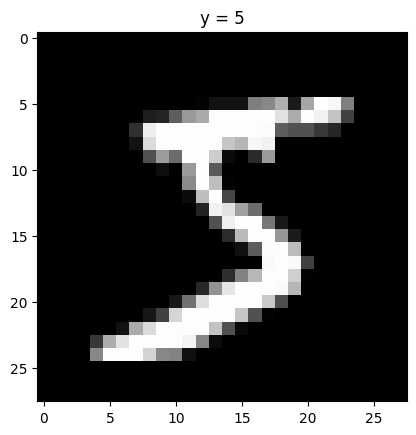

In [11]:
# Print the first image and label

print("First Image and Label")
show_data(train_dataset[0])

Each element in the rectangular tensor corresponds to a number which represents a pixel intensity, as demonstrated by the following image:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements">


In this image, the values are inverted i.e black represents white.


Print out the label of the fourth element:


In [12]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


The result shows the number in the image is 1


Plot  the fourth sample:


The image: 


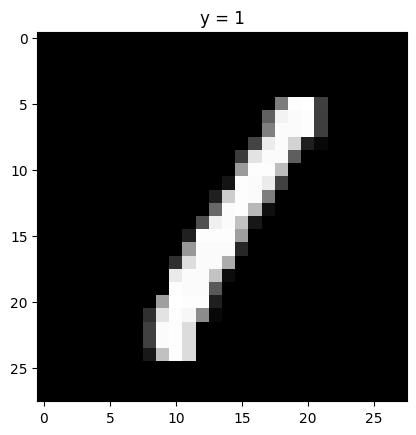

In [13]:
# Plot the image

print("The image: ")
show_data(train_dataset[3])

You see that it is a 1. Now, plot the third sample:


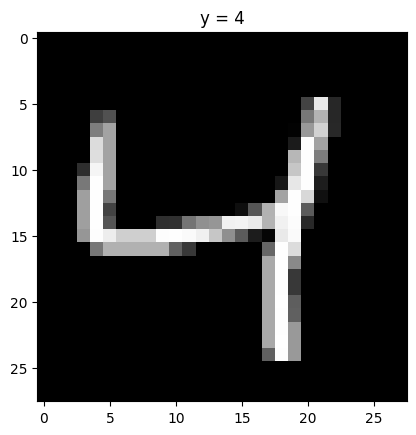

In [14]:
# Plot the image

show_data(train_dataset[2])

<!--Empty Space for separating topics-->


## 2) Build a Softmax Classifier


Build a Softmax classifier class:


In [15]:
# Define softmax classifier class
# Inherits nn.Module which is the base class for all neural networks
class SoftMax(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        # Creates a layer of given input size and output size
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        # Runs the x value through the single layers defined above
        z = self.linear(x)
        return z

The Softmax function requires vector inputs. Note that the vector shape is 28x28.


In [16]:
# Print the shape of the training dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

Flatten the tensor as shown in this image:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2image_to_vector.gif" width="550" alt="Flattern Image">


The size of the tensor is now 784.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2Imagetovector2.png" width="550" alt="Flattern Image">


Set the input size and output size:


In [17]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

<!--Empty Space for separating topics-->


## 2.1) Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model.


In [18]:
# Create the model
# Input dim is 28*28 which is the image converted to a tensor
# Output dim is 10 because there are 10 possible digits the image can be
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


View the size of the model parameters:


In [19]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


You can convert the model parameters for each class to a rectangular grid:  


<a>     <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2paramaters_to_image.gif" width="550," align="center"></a>


Plot the model parameters for each class as a square image:


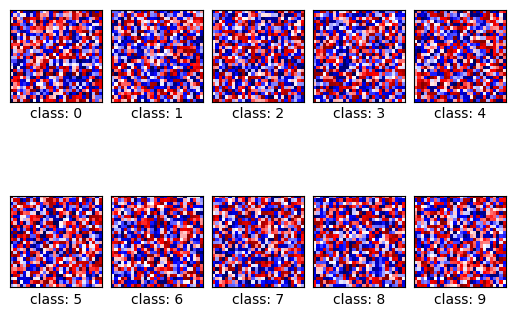

In [20]:
# Plot the model parameters for each class
# Since the model has not been trained yet the parameters look random

PlotParameters(model)

We can make a prediction


In [21]:
# First we get the X value of the first image
X = train_dataset[0][0]
# We can see the shape is 1 by 28 by 28, we need it to be flattened to 1 by 28 * 28 (784)
print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
# Now we can make a prediction, each class has a value, and the higher it is the more confident the model is that it is that digit
model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[ 0.1570, -0.0275, -0.0188,  0.2525, -0.3544, -0.0282, -0.0202, -0.0007,
         -0.1600, -0.3140]], grad_fn=<AddmmBackward0>)

Define the learning rate, optimizer, criterion, data loader:


In [29]:
# Define the learning rate, optimizer, criterion, and data loader

learning_rate = 0.1
# The optimizer will update the model parameters using the learning rate.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# The criterion will measure the loss between the prediction and actual label values
# This is where the SoftMax occurs, it is built into the Criterion Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Created a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# Created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

## 2.2) How Cross Entropy Loss uses SoftMax


We have X which is the X values of the first image and `actual` which is the digit class the image belongs to. The output `model_output` is the value the model assigns to each class for that image.


Output:  tensor([[ 0.1570, -0.0275, -0.0188,  0.2525, -0.3544, -0.0282, -0.0202, -0.0007,
         -0.1600, -0.3140]], grad_fn=<AddmmBackward0>)
Actual: tensor([5])


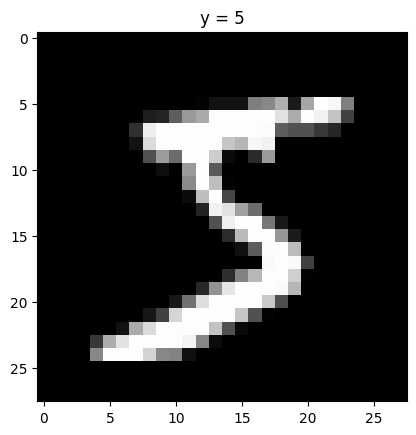

In [23]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])

show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual:", actual)

The criterion will take these values and return a loss


In [26]:
criterion(model_output, actual)

tensor(2.2948, grad_fn=<NllLossBackward0>)

Cross Entropy Loss takes probabilities and we can see that `model_output` are not probabilities, this is where softmax comes in


In [27]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.1213, 0.1008, 0.1017, 0.1334, 0.0727, 0.1008, 0.1016, 0.1036, 0.0883,
         0.0757]], grad_fn=<SoftmaxBackward0>)


Now that we have probabilities, we can just calculate the negative log of the probability of the class that this image belongs to. The image belongs to the target class so we calculate the negative log of the probability at the target index.


In [28]:
-1*torch.log(probability[0][actual])

tensor([2.2948], grad_fn=<MulBackward0>)

As you can see the result above matches the result of the criterion, this is how Cross Entropy Loss uses Softmax.


## 2.3) Apply the training with a smaller dataset and check the results.

In [34]:
num_samples = 5000

# Training
subset_indices = torch.arange(num_samples)
train_subset = Subset(train_dataset, subset_indices)
train_loader = DataLoader(dataset=train_subset, batch_size=100, shuffle=True)

# Validation
num_validation_samples = 1000
validation_subset_indices = torch.arange(num_validation_samples)
validation_subset = Subset(validation_dataset, validation_subset_indices)
validation_loader = DataLoader(dataset=validation_subset, batch_size=100, shuffle=True)

Train the model and determine validation accuracy. Depending on the number of epochs and the size of the training dataset it will take more or less time.


In [36]:
# Number of times we train our model useing the training data
n_epochs = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_test = len(validation_loader)

# Function to train the model based on number of epochs
def train_model(n_epochs):
    # Loops n_epochs times
    for epoch in range(n_epochs):
        # For each batch in the train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            # Calculates loss between the model output and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()

        # Each epoch we check how the model performs with data it has not seen which is the validation data, we are not training here
        correct = 0
        # For each batch in the validation loader
        for x_test, y_test in validation_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)

# Function call
train_model(n_epochs)

## 2.4) Apply the validation techniques.

Using confusion matrix evaluate the results of our model.


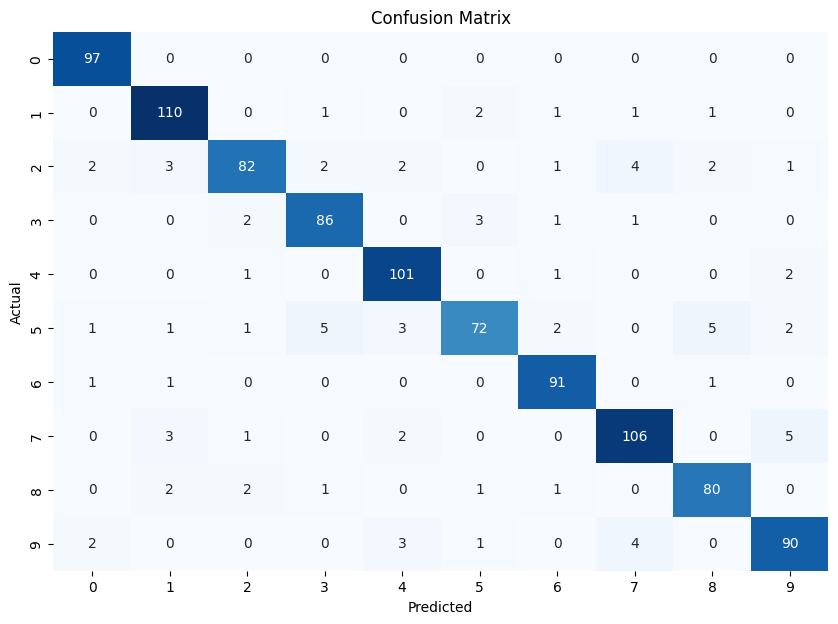

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        97
           1       0.92      0.95      0.93       116
           2       0.92      0.83      0.87        99
           3       0.91      0.92      0.91        93
           4       0.91      0.96      0.94       105
           5       0.91      0.78      0.84        92
           6       0.93      0.97      0.95        94
           7       0.91      0.91      0.91       117
           8       0.90      0.92      0.91        87
           9       0.90      0.90      0.90       100

    accuracy                           0.92      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.92      0.91      1000



In [37]:
# Generate the predictions for the validation data.
all_preds = []
all_labels = []

with torch.no_grad():
    for x_val, y_val in validation_loader:
        z = model(x_val.view(-1, 28 * 28))
        _, yhat = torch.max(z.data, 1)
        all_preds.extend(yhat.tolist())
        all_labels.extend(y_val.tolist())

# Show the confusion matrix.
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprime el classification report
print(classification_report(all_labels, all_preds))

It is easy to see that most of the elements are on the diagonal, and the F1-scores are very close to 1. This indicates that the model's performance is really good.

Plot the loss and accuracy on the validation data. This is how it should be seen:

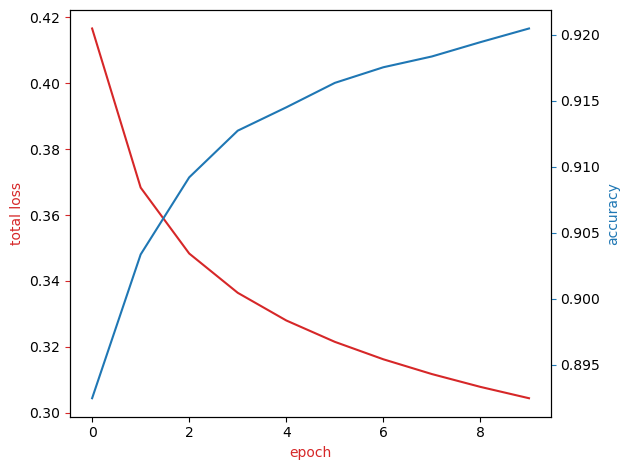

In [ ]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

And this is the aspect in our case:

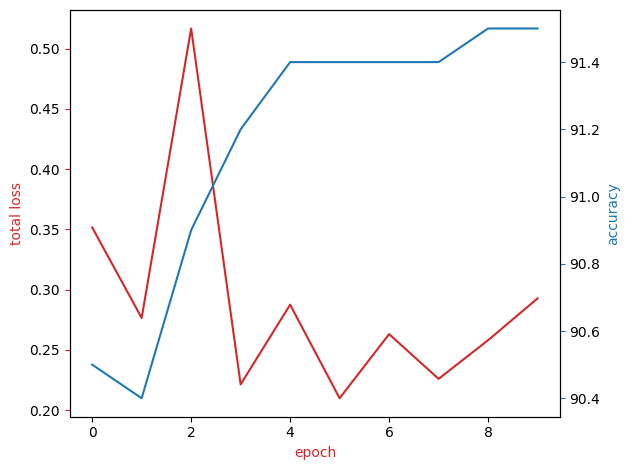

In [38]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

View the results of the parameters for each class after the training. You can see that they look like the corresponding numbers.


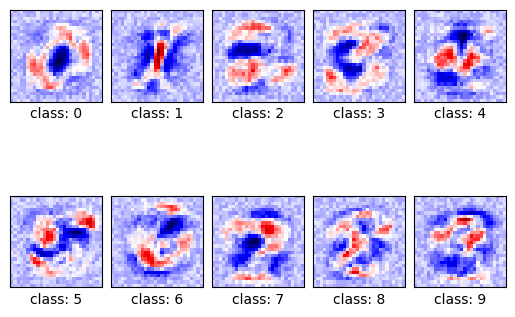

In [39]:
# Plot the parameters

PlotParameters(model)

We Plot the first five misclassified samples and the probability of that class.


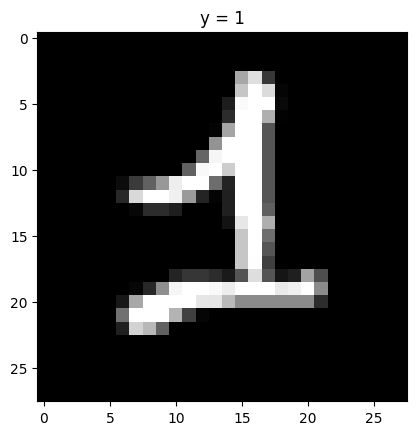

yhat: tensor([6])
probability of class  0.24609296023845673


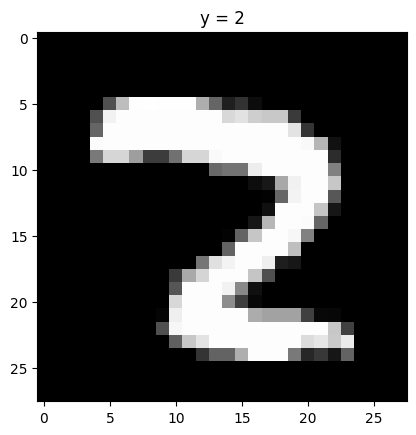

yhat: tensor([7])
probability of class  0.8185688257217407


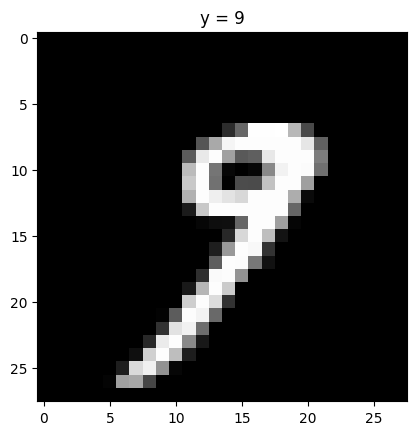

yhat: tensor([7])
probability of class  0.7740191221237183


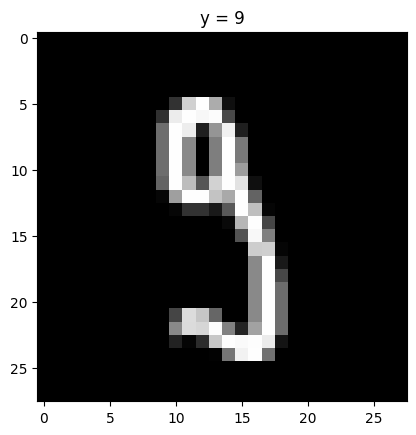

yhat: tensor([5])
probability of class  0.41526737809181213


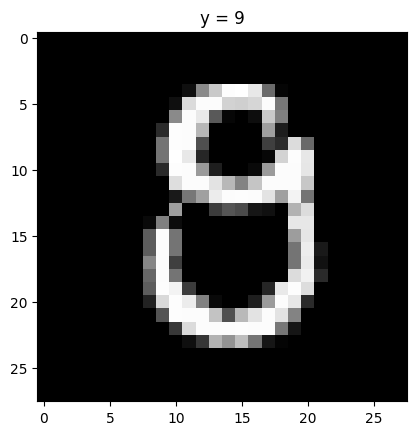

yhat: tensor([0])
probability of class  0.3683518171310425


In [40]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

<!--Empty Space for separating topics-->


We plot the first five correctly classified samples and the probability of that class. We see the probability is much larger.


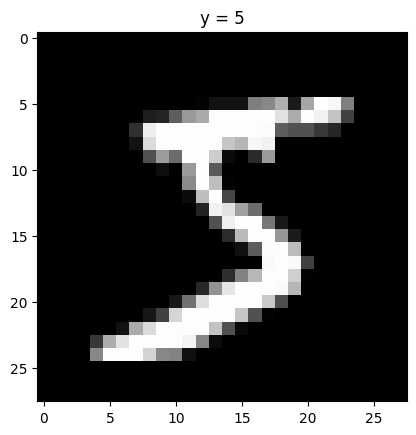

yhat: tensor([5])
probability of class  0.6866508722305298


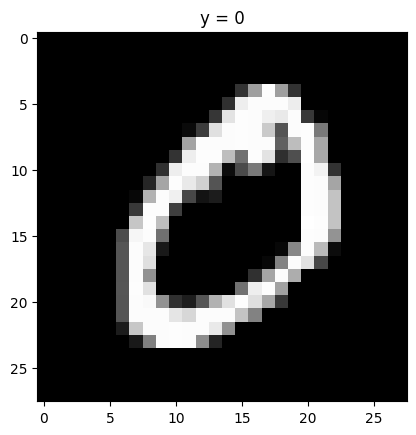

yhat: tensor([0])
probability of class  0.9976892471313477


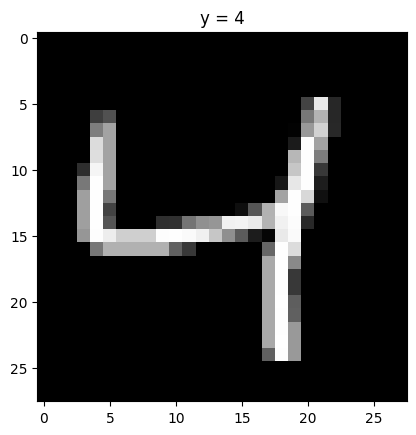

yhat: tensor([4])
probability of class  0.9223520159721375


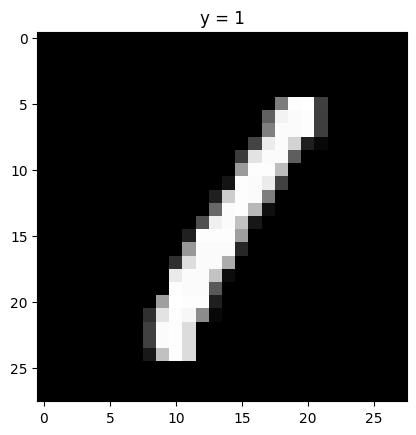

yhat: tensor([1])
probability of class  0.9706422686576843


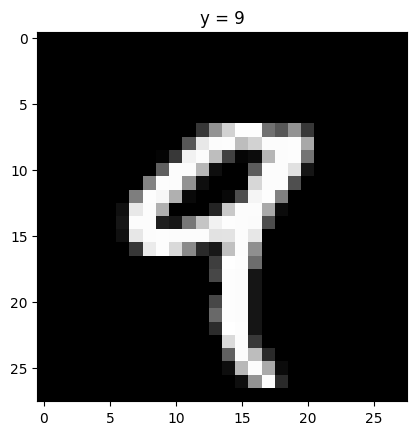

yhat: tensor([9])
probability of class  0.9212117791175842


In [41]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

So, when the model makes a wrong classification, it usually does it with a lower probability than when it makes a correct prediction.

Calculate for every value in the validation dataset, and build a dataset with the predictions and their probabilities.

In [57]:
all_preds = []
all_labels = []
all_probs = []
model.eval()

with torch.no_grad():
    for x_val, y_val in validation_loader:
        z = model(x_val.view(-1, 28 * 28))  # Make the predictions.
        prob = F.softmax(z, dim=1)  # Calculate the probabilities.
        _, yhat = torch.max(z.data, 1)
        max_probs = prob.max(dim=1)[0]

        all_preds.extend(yhat.tolist())
        all_labels.extend(y_val.tolist())
        all_probs.extend([round(p.item(), 2) for p in max_probs])  # Make a round in the probabilities.

# Create the dataframe:
df_results = pd.DataFrame({
    'Real_Label': all_labels,
    'Predicted_Label': all_preds,
    'Predicted_Probability': all_probs
})

df_results.head()

,Real_Label,Predicted_Label,Predicted_Probability
0,2,2,0.88
1,5,5,0.56
2,8,8,0.56
3,9,9,0.76
4,1,1,0.96


  Determine the correct predictions.

In [59]:
df_results['Match'] = df_results['Real_Label'] == df_results['Predicted_Label']

In [60]:
df_wrong_results=df_results[df_results['Match']==False]
df_good_results=df_results[df_results['Match']==True]

Confirm the proabbilities are lower when the predictions in incorrect.

In [63]:
print(df_wrong_results['Predicted_Probability'].mean())
print(df_good_results['Predicted_Probability'].mean())

0.554470588235294
0.8868306010928962
